In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [3]:
spam_data = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/PhiUSIIL_Phishing_URL_Dataset.csv", delimiter=",")
spam_data = spam_data.drop(columns=["FILENAME", "URL", "Domain", "Title",
                                            "HasObfuscation", "NoOfObfuscatedChar",
                                            "ObfuscationRatio", "TLD",
                                            "NoOfAmpersandInURL","TLDLength",
                                            ], axis=1)

spam_data = spam_data.drop_duplicates()
spam_data = spam_data.sample(n=23499, random_state=115712)

In [4]:
X_mat = spam_data.drop(["label"], axis=1)
y_target = spam_data.drop(["URLLength", "DomainLength", "IsDomainIP",
                               "CharContinuationRate",
                               "TLDLegitimateProb", "URLCharProb",
                               "NoOfSubDomain", "NoOfLettersInURL", "LetterRatioInURL",
                               "NoOfDegitsInURL", "DegitRatioInURL", "NoOfEqualsInURL",
                               "NoOfQMarkInURL", "NoOfOtherSpecialCharsInURL",
                               "SpacialCharRatioInURL", "IsHTTPS", "LineOfCode",
                               "LargestLineLength", "HasTitle", "DomainTitleMatchScore",
                               "HasFavicon", "Robots", "IsResponsive", "NoOfURLRedirect",
                               "NoOfSelfRedirect", "HasDescription", "NoOfPopup", "NoOfiFrame",
                               "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton",
                               "HasHiddenFields", "HasPasswordField", "Pay", "Bank",
                               "Crypto", "HasCopyrightInfo", "NoOfImage", "NoOfCSS",
                               "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef",
                                "URLSimilarityIndex", "URLTitleMatchScore",
                                  "NoOfExternalRef"],
                               axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_mat, y_target, test_size=0.2,
                                                    random_state=410205)

[Text(0.4, 0.8333333333333334, 'CharContinuationRate <= 98.076\ngini = 0.49\nsamples = 18799\nvalue = [8042, 10757]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 7982\nvalue = [7982, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'LargestLineLength <= 81.0\ngini = 0.011\nsamples = 10817\nvalue = [60, 10757]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 60\nvalue = [60, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 10757\nvalue = [0, 10757]')]

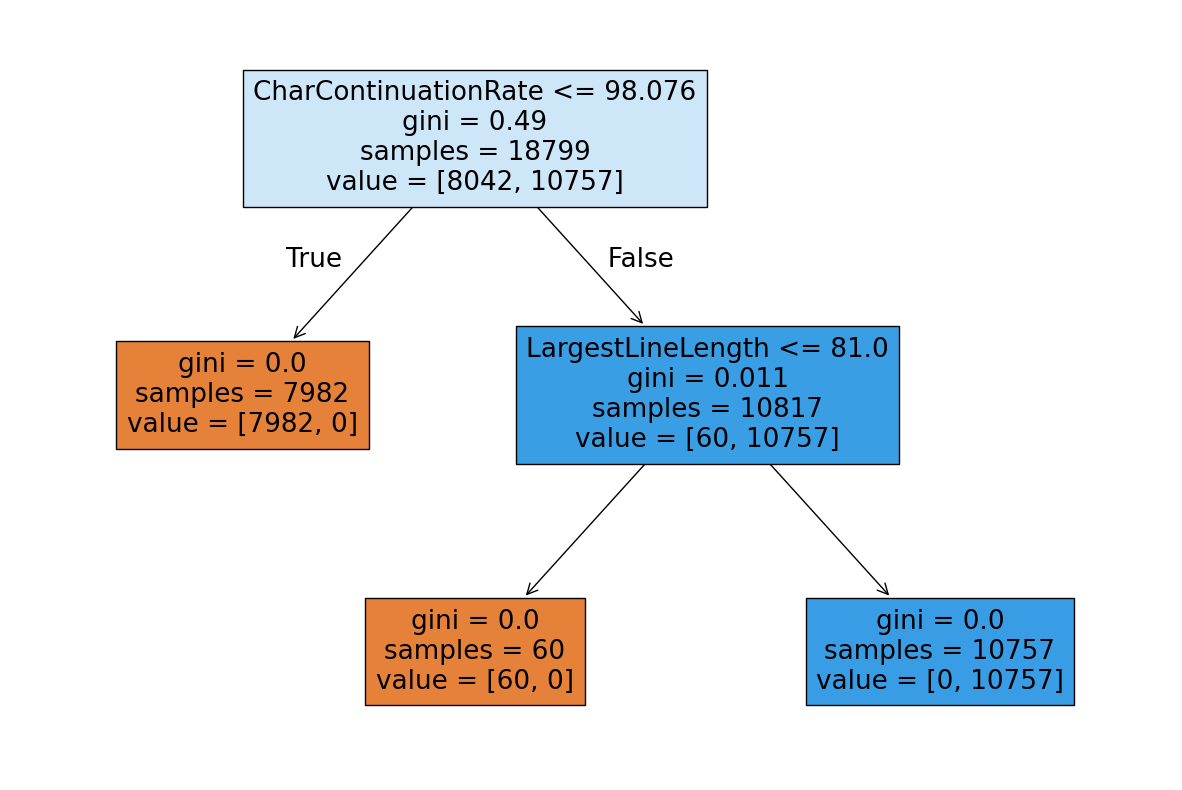

In [5]:
# Decision Tree Classifier

spam_gini_bintree = DecisionTreeClassifier(max_leaf_nodes=45, criterion="gini", 
                                      random_state=364370)
spam_gini_fit = spam_gini_bintree.fit(X_train, y_train)

fig = plt.figure(figsize=(15, 10))
tree.plot_tree(spam_gini_fit, feature_names=["URLLength", "DomainLength", "IsDomainIP",
                               "CharContinuationRate",
                               "TLDLegitimateProb", "URLCharProb",
                               "NoOfSubDomain", "NoOfLettersInURL", "LetterRatioInURL",
                               "NoOfDegitsInURL", "DegitRatioInURL", "NoOfEqualsInURL",
                               "NoOfQMarkInURL", "NoOfOtherSpecialCharsInURL",
                               "SpacialCharRatioInURL", "IsHTTPS", "LineOfCode",
                               "LargestLineLength", "HasTitle", "DomainTitleMatchScore",
                               "HasFavicon", "Robots", "IsResponsive", "NoOfURLRedirect",
                               "NoOfSelfRedirect", "HasDescription", "NoOfPopup", "NoOfiFrame",
                               "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton",
                               "HasHiddenFields", "HasPasswordField", "Pay", "Bank",
                               "Crypto", "HasCopyrightInfo", "NoOfImage", "NoOfCSS",
                               "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef",
                                "URLSimilarityIndex", "URLTitleMatchScore",
                                  "NoOfExternalRef"],
    filled=True)

In [6]:
# Computing prediction accuracy of Gini tree on testing set.

y_pred = spam_gini_fit.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

0.9997872340425532

In [7]:
# Feature Importance via RandomForest Classifier

rf_spam_gini = RandomForestClassifier(n_estimators=100, criterion="gini",
                random_state=234090, max_depth=50, max_features=45)
rf_spam_gini.fit(X_train, y_train)

feature_importances = pd.Series(rf_spam_gini.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

y_pred_rf = rf_spam_gini.predict(X_test)
accuracy_rf = accuracy_score(y_pred_rf, y_test)
print(accuracy_rf)

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


URLSimilarityIndex            0.987066
LineOfCode                    0.010432
IsHTTPS                       0.002502
URLLength                     0.000000
HasHiddenFields               0.000000
NoOfSelfRedirect              0.000000
HasDescription                0.000000
NoOfPopup                     0.000000
NoOfiFrame                    0.000000
HasExternalFormSubmit         0.000000
HasSocialNet                  0.000000
HasSubmitButton               0.000000
HasPasswordField              0.000000
IsResponsive                  0.000000
Bank                          0.000000
Pay                           0.000000
Crypto                        0.000000
HasCopyrightInfo              0.000000
NoOfImage                     0.000000
NoOfCSS                       0.000000
NoOfJS                        0.000000
NoOfSelfRef                   0.000000
NoOfEmptyRef                  0.000000
NoOfURLRedirect               0.000000
HasFavicon                    0.000000
Robots                   

In [8]:
# Feature Importance via Gradient Boosting Classifier

gbspam_params = {'n_estimators':1000, 'max_depth':45,
                 'learning_rate':0.1}
gbspam_class = GradientBoostingClassifier(**gbspam_params)
gbspam_class.fit(X_train, y_train)

# Variable Importance

var_names=pd.DataFrame(["URLLength", "DomainLength", "IsDomainIP",
                               "CharContinuationRate",
                               "TLDLegitimateProb", "URLCharProb",
                               "NoOfSubDomain", "NoOfLettersInURL", "LetterRatioInURL",
                               "NoOfDegitsInURL", "DegitRatioInURL", "NoOfEqualsInURL",
                               "NoOfQMarkInURL", "NoOfOtherSpecialCharsInURL",
                               "SpacialCharRatioInURL", "IsHTTPS", "LineOfCode",
                               "LargestLineLength", "HasTitle", "DomainTitleMatchScore",
                               "HasFavicon", "Robots", "IsResponsive", "NoOfURLRedirect",
                               "NoOfSelfRedirect", "HasDescription", "NoOfPopup", "NoOfiFrame",
                               "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton",
                               "HasHiddenFields", "HasPasswordField", "Pay", "Bank",
                               "Crypto", "HasCopyrightInfo", "NoOfImage", "NoOfCSS",
                               "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef",
                                "URLSimilarityIndex", "URLTitleMatchScore",
                                  "NoOfExternalRef"], columns=['var_name'])
loss_reduction=pd.DataFrame(gbspam_class.feature_importances_, columns=['loss_reduction'])
var_importance=pd.concat([var_names, loss_reduction], axis=1) 
print(var_importance.sort_values("loss_reduction", axis=0, ascending=False))

y_pred_gb = gbspam_class.predict(X_test)
accuracy_gb = accuracy_score(y_pred_gb, y_test)
print(accuracy_gb)

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                      var_name  loss_reduction
3         CharContinuationRate    9.870337e-01
17           LargestLineLength    1.296627e-02
6                NoOfSubDomain    3.928093e-14
18                    HasTitle    9.487720e-15
21                      Robots    4.952866e-15
9              NoOfDegitsInURL    3.867690e-15
5                  URLCharProb    2.029752e-15
4            TLDLegitimateProb    1.315877e-15
44             NoOfExternalRef    4.334032e-16
42          URLSimilarityIndex    3.088386e-16
16                  LineOfCode    4.041772e-17
15                     IsHTTPS    2.200008e-17
1                 DomainLength    1.948226e-17
8             LetterRatioInURL    8.396100e-18
11             NoOfEqualsInURL    6.467768e-18
40                 NoOfSelfRef    6.129754e-18
20                  HasFavicon    2.972717e-19
7             NoOfLettersInURL    7.558232e-20
32            HasPasswordField    3.259312e-20
38                     NoOfCSS    3.259312e-20
41           

In [9]:
# Gaussian Naive Bayes Classifier

nb_spam = GaussianNB()
nb_spam.fit(X_train, y_train)
y_pred_nb = nb_spam.predict(X_test)

accuracy_nb = accuracy_score(y_pred_nb, y_test)
print(accuracy_nb)

0.9917021276595744


c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: 

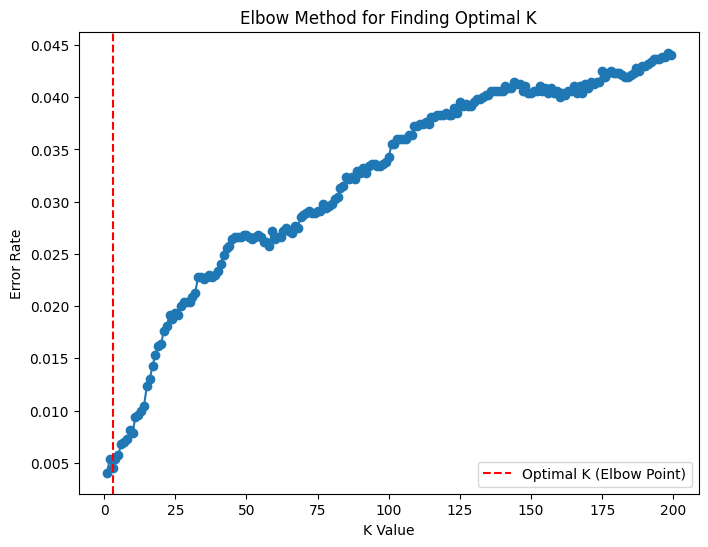

In [10]:
k_values = range(1, 200)
acc_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_elbow = knn.predict(X_test)
    acc_rate = 1 - accuracy_score(y_test, y_pred_elbow)
    acc_rates.append(acc_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, acc_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=3, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

In [11]:
# K Neighbors Classifier

knn_spam = KNeighborsClassifier(n_neighbors=5)
knn_spam.fit(X_train, y_train)

y_pred_knn = knn_spam.predict(X_test)
accuracy_knn = accuracy_score(y_pred_knn, y_test)
print(accuracy_knn)

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9942553191489362


In [12]:
# Support Vector Classifier (using linear, polynomial, radial, and sigmoidal kernels)

svc_lin_spam = SVC(kernel="linear").fit(X_train, y_train)
svc_poly_spam = SVC(kernel="poly").fit(X_train, y_train)
svc_radial_spam = SVC(kernel="rbf").fit(X_train, y_train)
svc_sigmoid_spam = SVC(kernel="sigmoid").fit(X_train, y_train)

y_pred_lin_svc = svc_lin_spam.predict(X_test)
y_pred_poly_svc = svc_poly_spam.predict(X_test)
y_pred_rad_svc = svc_radial_spam.predict(X_test)
y_pred_sigmoid_svc = svc_sigmoid_spam.predict(X_test)

accuracy_linsvc = accuracy_score(y_pred_lin_svc, y_test)
accuracy_polysvc = accuracy_score(y_pred_poly_svc, y_test)
accuracy_radsvc = accuracy_score(y_pred_rad_svc, y_test)
accuracy_sigmoidsvc = accuracy_score(y_pred_sigmoid_svc, y_test)

print("Linear: ", round(accuracy_linsvc, 4))
print("Polynomial: ", round(accuracy_polysvc, 4))
print("Radial: ", round(accuracy_radsvc, 4))
print("Sigmoid: ", round(accuracy_sigmoidsvc, 4))

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataC

Linear:  1.0
Polynomial:  0.5915
Radial:  0.7651
Sigmoid:  0.3051


[Text(0.3333333333333333, 0.875, 'LargestLineLength <= 98.076\ngini = 0.49\nsamples = 18799\nvalue = [8042, 10757]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 7982\nvalue = [7982, 0]'),
 Text(0.25, 0.75, 'True  '),
 Text(0.5, 0.625, 'URLSimilarityIndex <= 0.5\ngini = 0.011\nsamples = 10817\nvalue = [60, 10757]'),
 Text(0.41666666666666663, 0.75, '  False'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 59\nvalue = [59, 0]'),
 Text(0.6666666666666666, 0.375, 'LetterRatioInURL <= 65.5\ngini = 0.0\nsamples = 10758\nvalue = [1, 10757]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 10757\nvalue = [0, 10757]')]

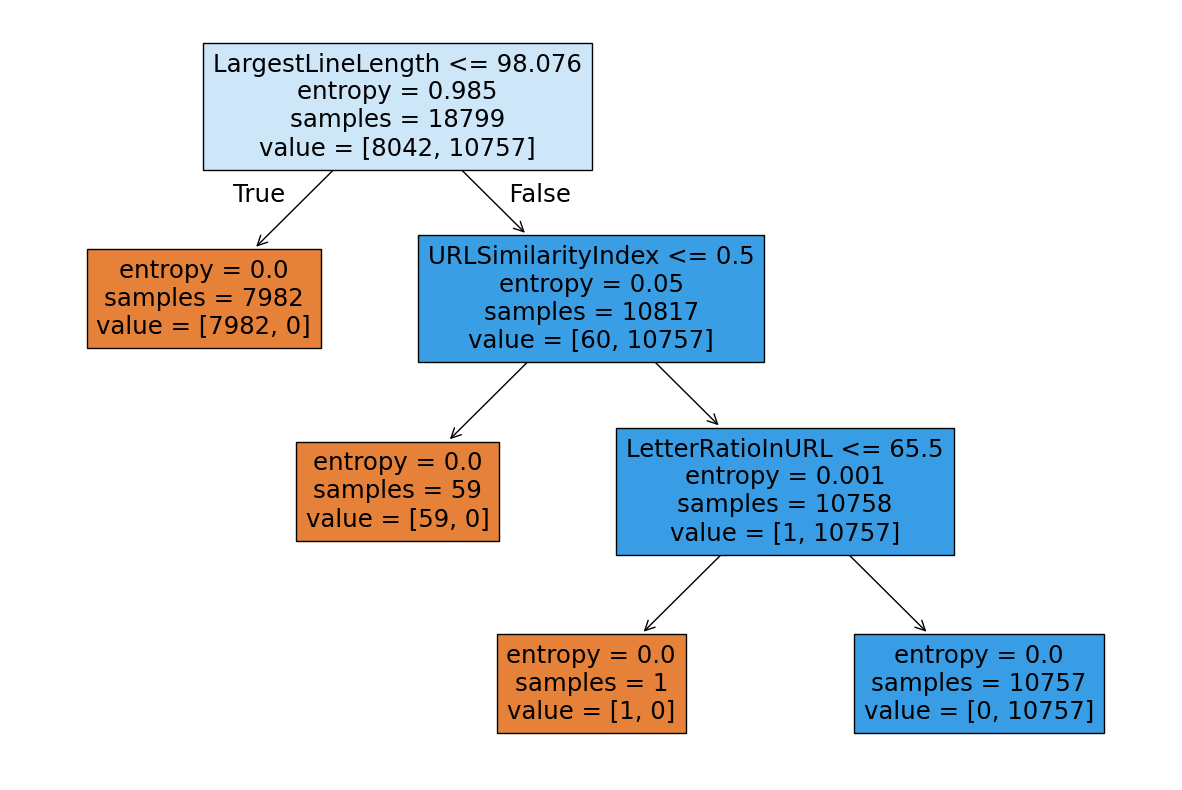

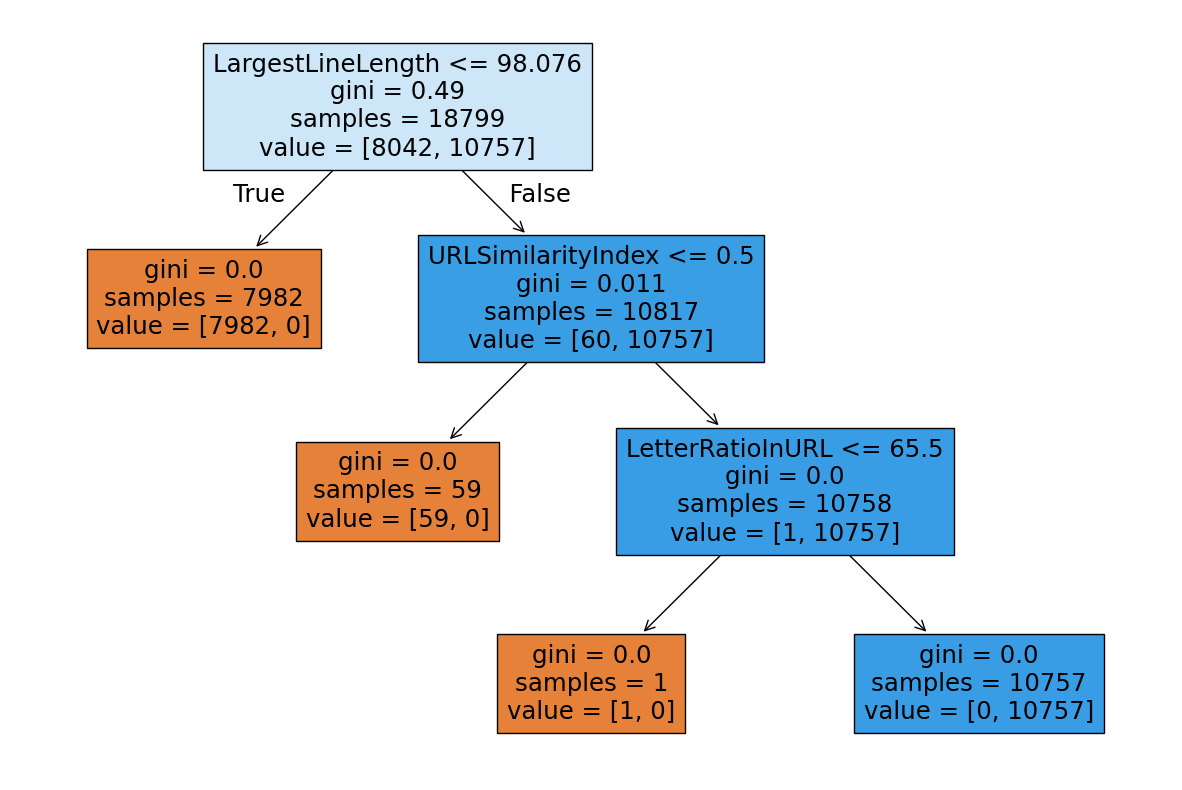

In [13]:
# Final Code to be used for the report.

phish_data = pd.read_csv("C:/Users/coryg/OneDrive/Desktop/STAT_574_Data_Mining/PhiUSIIL_Phishing_URL_Dataset.csv", delimiter=",")
phish_data = phish_data.drop(columns=["FILENAME", "URL", "Domain", "Title",
                                            "HasObfuscation", "NoOfObfuscatedChar",
                                            "ObfuscationRatio", "TLD",
                                            "NoOfAmpersandInURL","TLDLength",
                                            ], axis=1)

phish_data = phish_data.drop_duplicates()
phish_data = phish_data.sample(n=23499, random_state=115712)

X_mat2 = phish_data.loc[:, phish_data.columns.intersection(["CharContinuationRate", "LargestLineLength",
                "NoOfSubDomain", "HasTitle", "URLCharProb", "NoOfDegitsInURL",
                "NoOfExternalRef", "TLDLegitimateProb", "IsHTTPS", 
                "URLSimilarityIndex", "LetterRatioInURL", "URLLength",
                "SpacialCharRatioInURL", "NoOfSelfRedirect"])]
y_target2 = phish_data.drop(["URLLength", "DomainLength", "IsDomainIP",
                "CharContinuationRate",
                "TLDLegitimateProb", "URLCharProb",
                "NoOfSubDomain", "NoOfLettersInURL", "LetterRatioInURL",
                "NoOfDegitsInURL", "DegitRatioInURL", "NoOfEqualsInURL",
                "NoOfQMarkInURL", "NoOfOtherSpecialCharsInURL",
                "SpacialCharRatioInURL", "IsHTTPS", "LineOfCode",
                "LargestLineLength", "HasTitle", "DomainTitleMatchScore",
                "HasFavicon", "Robots", "IsResponsive", "NoOfURLRedirect",
                "NoOfSelfRedirect", "HasDescription", "NoOfPopup", "NoOfiFrame",
                "HasExternalFormSubmit", "HasSocialNet", "HasSubmitButton",
                "HasHiddenFields", "HasPasswordField", "Pay", "Bank",
                "Crypto", "HasCopyrightInfo", "NoOfImage", "NoOfCSS",
                "NoOfJS", "NoOfSelfRef", "NoOfEmptyRef",
                "URLSimilarityIndex", "URLTitleMatchScore",
                "NoOfExternalRef"],
                axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_mat2, y_target2, test_size=0.2,
                                                    random_state=410205)

# Decision Tree Classifiers

spam_entropy_bintree = DecisionTreeClassifier(max_leaf_nodes=14, criterion="entropy",
                                              random_state=402433)
spam_gini_bintree = DecisionTreeClassifier(max_leaf_nodes=14, criterion="gini", 
                                      random_state=364370)
spam_entropy_fit = spam_entropy_bintree.fit(X_train, y_train)
spam_gini_fit = spam_gini_bintree.fit(X_train, y_train)
fig1 = plt.figure(figsize=(15, 10))
tree.plot_tree(spam_entropy_fit, feature_names=["CharContinuationRate", "LargestLineLength",
                "NoOfSubDomain", "HasTitle", "URLCharProb", "NoOfDegitsInURL",
                "NoOfExternalRef", "TLDLegitimateProb", "IsHTTPS", 
                "URLSimilarityIndex", "LetterRatioInURL", "URLLength",
                "SpacialCharRatioInURL", "NoOfSelfRedirect"],
    filled=True)
spam_gini_fit = spam_gini_bintree.fit(X_train, y_train)
fig2 = plt.figure(figsize=(15, 10))
tree.plot_tree(spam_gini_fit, feature_names=["CharContinuationRate", "LargestLineLength",
                "NoOfSubDomain", "HasTitle", "URLCharProb", "NoOfDegitsInURL",
                "NoOfExternalRef", "TLDLegitimateProb", "IsHTTPS", 
                "URLSimilarityIndex", "LetterRatioInURL", "URLLength",
                "SpacialCharRatioInURL", "NoOfSelfRedirect"],
    filled=True)


In [14]:
# Computing prediction accuracy of Entropy and Gini trees on testing set.

y_pred = spam_entropy_fit.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
y_pred2 = spam_gini_fit.predict(X_test)
accuracy2 = accuracy_score(y_pred2, y_test)

print(round(accuracy, 4))
print(round(accuracy2, 4))

1.0
1.0


In [15]:
# Random Forest Classifiers (Entropy and Gini)

rf_spam_gini = RandomForestClassifier(n_estimators=100, criterion="gini",
                random_state=234090, max_depth=25, max_features=14)
rf_spam_gini.fit(X_train, y_train)

feature_importances = pd.Series(rf_spam_gini.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)
print(feature_importances)

y_pred_rf = rf_spam_gini.predict(X_test)
accuracy_rf = accuracy_score(y_pred_rf, y_test)
print(accuracy_rf)

rf_spam_entropy = RandomForestClassifier(n_estimators=100, criterion="entropy",
                random_state=234090, max_depth=25, max_features=14)
rf_spam_entropy.fit(X_train, y_train)

feature_importances2 = pd.Series(rf_spam_entropy.feature_importances_, index=X_train.columns)
feature_importances2 = feature_importances2.sort_values(ascending=False)
print(feature_importances2)

y_pred_rf = rf_spam_gini.predict(X_test)
accuracy_rf = accuracy_score(y_pred_rf, y_test)
print(accuracy_rf)

y_pred_ent_rf = rf_spam_entropy.predict(X_test)
accuracy_rf_ent = accuracy_score(y_pred_ent_rf, y_test)
print(accuracy_rf_ent)

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


URLSimilarityIndex       0.987066
IsHTTPS                  0.012606
LargestLineLength        0.000327
URLLength                0.000000
CharContinuationRate     0.000000
TLDLegitimateProb        0.000000
URLCharProb              0.000000
NoOfSubDomain            0.000000
LetterRatioInURL         0.000000
NoOfDegitsInURL          0.000000
SpacialCharRatioInURL    0.000000
HasTitle                 0.000000
NoOfSelfRedirect         0.000000
NoOfExternalRef          0.000000
dtype: float64
1.0


c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


URLSimilarityIndex       0.971153
IsHTTPS                  0.027840
LargestLineLength        0.001008
URLLength                0.000000
CharContinuationRate     0.000000
TLDLegitimateProb        0.000000
URLCharProb              0.000000
NoOfSubDomain            0.000000
LetterRatioInURL         0.000000
NoOfDegitsInURL          0.000000
SpacialCharRatioInURL    0.000000
HasTitle                 0.000000
NoOfSelfRedirect         0.000000
NoOfExternalRef          0.000000
dtype: float64
1.0
1.0


In [16]:
# Feature Importance via Gradient Boosting Classifier

gbspam_params = {'n_estimators':1000, 'max_depth':14,
                 'learning_rate':0.1}
gbspam_class = GradientBoostingClassifier(**gbspam_params)
gbspam_class.fit(X_train, y_train)

# Variable Importance

var_names=pd.DataFrame(["CharContinuationRate", "LargestLineLength",
                "NoOfSubDomain", "HasTitle", "URLCharProb", "NoOfDegitsInURL",
                "NoOfExternalRef", "TLDLegitimateProb", "IsHTTPS", 
                "URLSimilarityIndex", "LetterRatioInURL", "URLLength",
                "SpacialCharRatioInURL", "NoOfSelfRedirect"], columns=['var_name'])
loss_reduction=pd.DataFrame(gbspam_class.feature_importances_, columns=['loss_reduction'])
var_importance=pd.concat([var_names, loss_reduction], axis=1) 
print(var_importance.sort_values("loss_reduction", axis=0, ascending=False))

y_pred_gb = gbspam_class.predict(X_test)
accuracy_gb = accuracy_score(y_pred_gb, y_test)
print(accuracy_gb)

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


                 var_name  loss_reduction
1       LargestLineLength    9.870337e-01
9      URLSimilarityIndex    1.274898e-02
10       LetterRatioInURL    2.172897e-04
4             URLCharProb    4.475918e-14
2           NoOfSubDomain    2.147622e-15
8                 IsHTTPS    6.607869e-16
6         NoOfExternalRef    2.582973e-16
0    CharContinuationRate    2.173303e-16
3                HasTitle    2.080338e-16
13       NoOfSelfRedirect    2.060965e-16
11              URLLength    3.259312e-20
12  SpacialCharRatioInURL    3.259312e-20
5         NoOfDegitsInURL    0.000000e+00
7       TLDLegitimateProb    0.000000e+00
1.0


In [17]:
# Gaussian Naive Bayes Classifier

nb_spam = GaussianNB()
nb_spam.fit(X_train, y_train)
y_pred_nb = nb_spam.predict(X_test)

accuracy_nb = accuracy_score(y_pred_nb, y_test)
print(accuracy_nb)

0.9880851063829788


c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: 

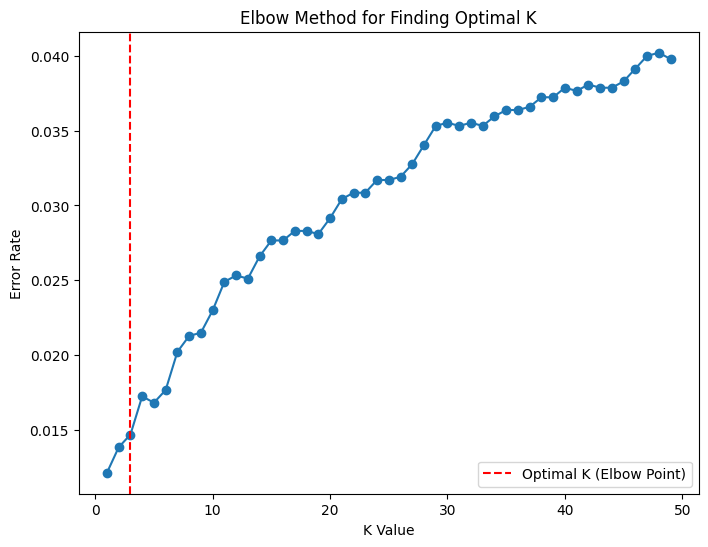

In [18]:
k_values = range(1, 50)
acc_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_elbow = knn.predict(X_test)
    acc_rate = 1 - accuracy_score(y_test, y_pred_elbow)
    acc_rates.append(acc_rate)

plt.figure(figsize=(8, 6))
plt.plot(k_values, acc_rates, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Elbow Method for Finding Optimal K')
plt.axvline(x=3, linestyle='--', color='red', label="Optimal K (Elbow Point)")
plt.legend()
plt.show()

In [19]:
# K Neighbors Classifier

knn_spam = KNeighborsClassifier(n_neighbors=3)
knn_spam.fit(X_train, y_train)

y_pred_knn = knn_spam.predict(X_test)
accuracy_knn = accuracy_score(y_pred_knn, y_test)
print(accuracy_knn)

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9853191489361702


In [ ]:
# Support Vector Classifier (using linear, polynomial, radial, and sigmoidal kernels)

svc_lin_spam = SVC(kernel="linear").fit(X_train, y_train)
svc_poly_spam = SVC(kernel="poly").fit(X_train, y_train)
svc_radial_spam = SVC(kernel="rbf").fit(X_train, y_train)
svc_sigmoid_spam = SVC(kernel="sigmoid").fit(X_train, y_train)

y_pred_lin_svc = svc_lin_spam.predict(X_test)
y_pred_poly_svc = svc_poly_spam.predict(X_test)
y_pred_rad_svc = svc_radial_spam.predict(X_test)
y_pred_sigmoid_svc = svc_sigmoid_spam.predict(X_test)

accuracy_linsvc = accuracy_score(y_pred_lin_svc, y_test)
accuracy_polysvc = accuracy_score(y_pred_poly_svc, y_test)
accuracy_radsvc = accuracy_score(y_pred_rad_svc, y_test)
accuracy_sigmoidsvc = accuracy_score(y_pred_sigmoid_svc, y_test)

print("Linear: ", round(accuracy_linsvc, 4))
print("Polynomial: ", round(accuracy_polysvc, 4))
print("Radial: ", round(accuracy_radsvc, 4))
print("Sigmoid: ", round(accuracy_sigmoidsvc, 4))

c:\Users\coryg\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
